In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings ('ignore')
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\gold_monthly_csv.csv')

In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [5]:
df.shape

(847, 2)

In [6]:
print(f"Date range of gold prices available from -{df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from -1950-01 to 2020-07


In [7]:
date = pd.date_range (start='1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [8]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


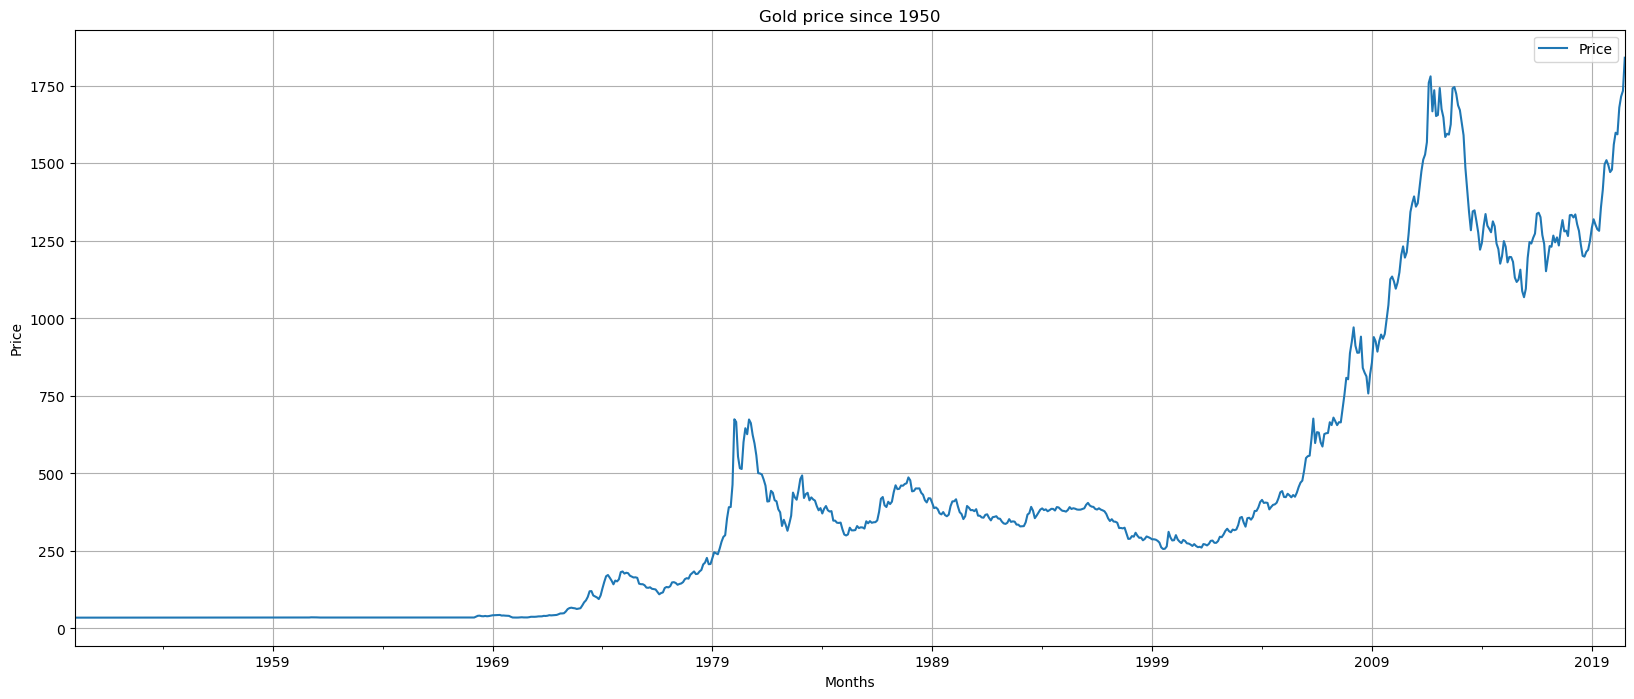

In [9]:
df.plot(figsize=(20,8))
plt.title ('Gold price since 1950')
plt.xlabel("Months")
plt.ylabel('Price')
plt.grid()


In [10]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


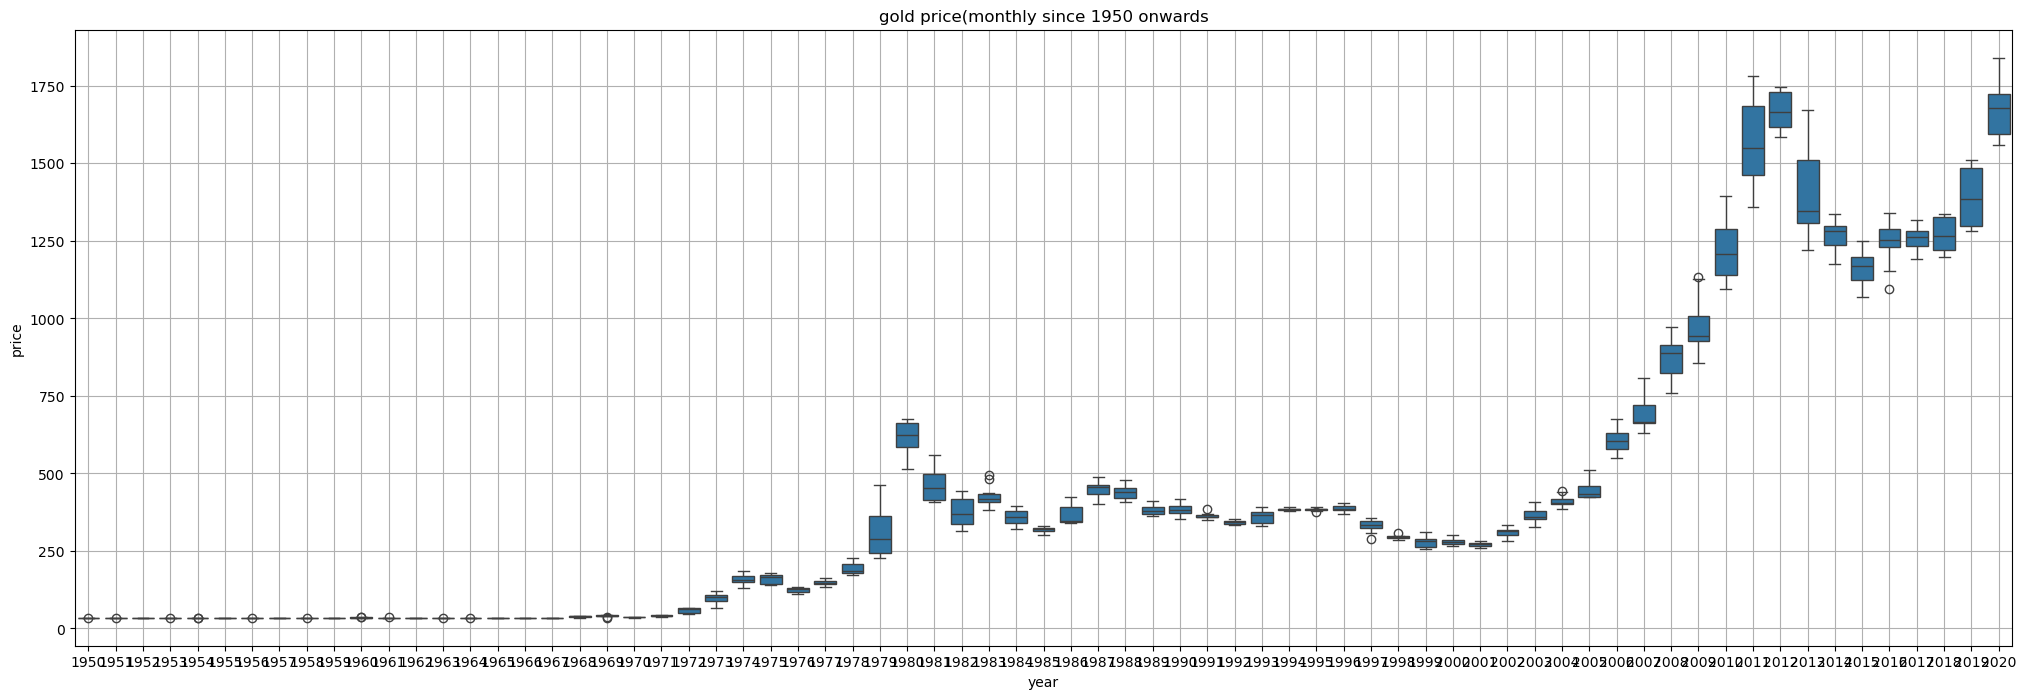

In [11]:
ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0])
plt.title('gold price(monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')

plt.grid();


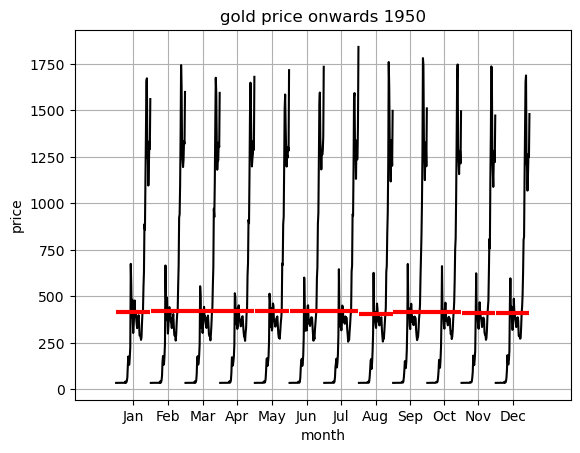

In [12]:
from statsmodels.graphics.tsaplots import month_plot


month_plot(df,ylabel = 'goldprice')
plt.title('gold price onwards 1950')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

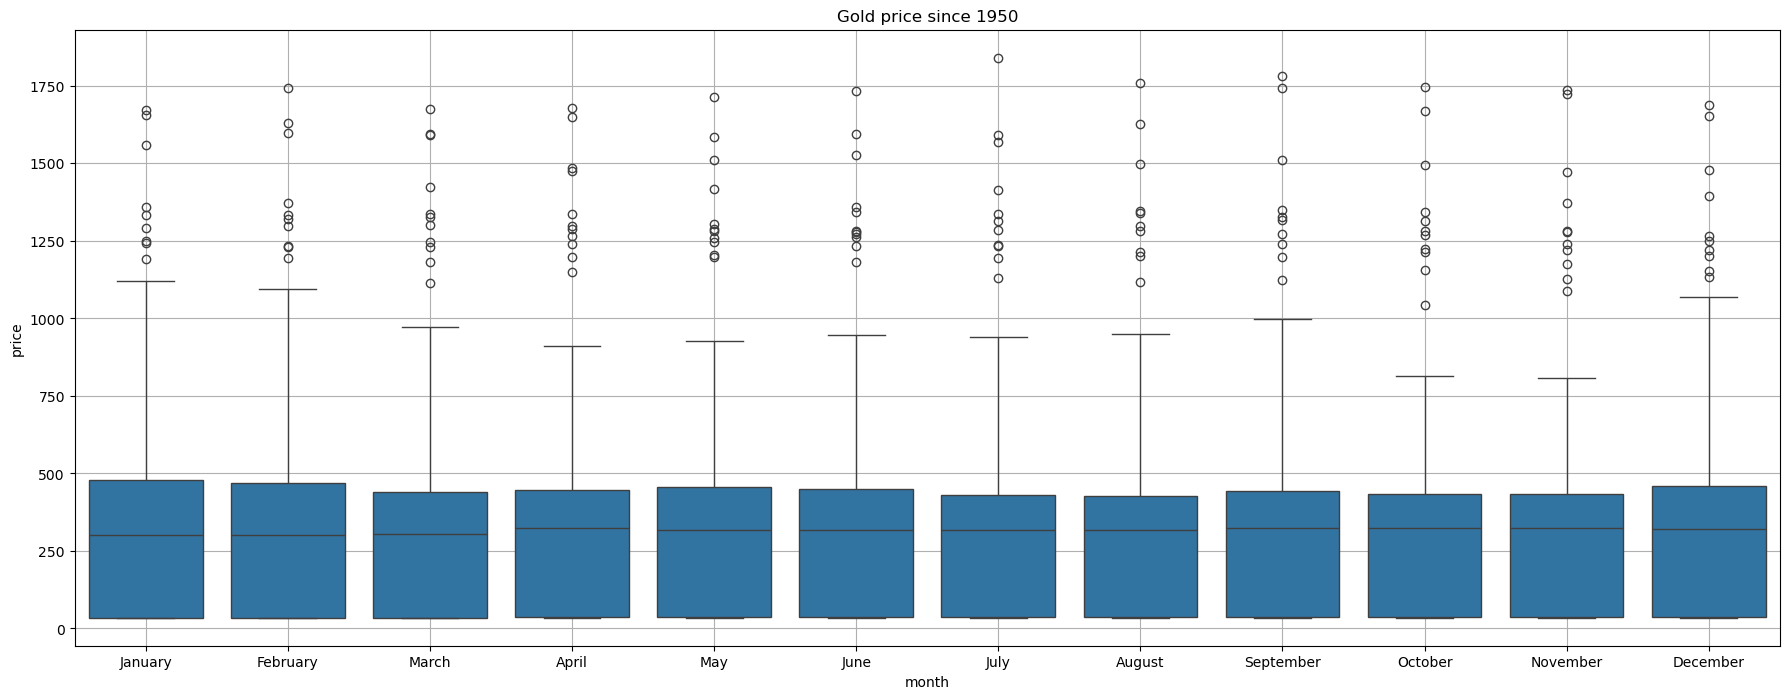

In [13]:
ax = plt.subplots (figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0])
plt.title('Gold price since 1950')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

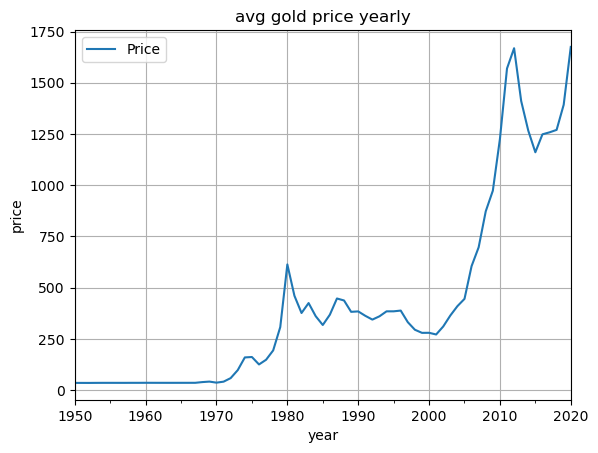

In [14]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();


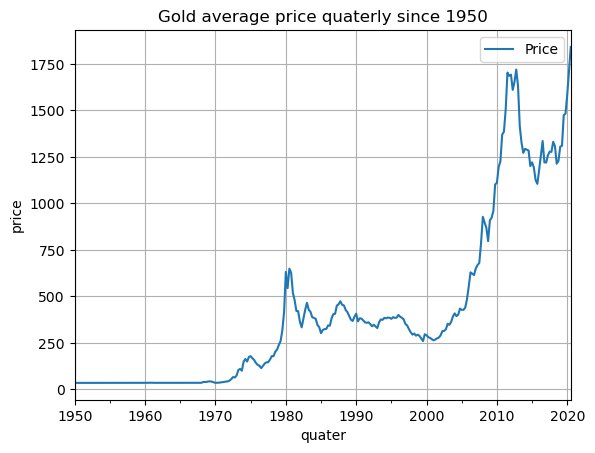

In [15]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title('Gold average price quaterly since 1950')
plt.xlabel('quater')
plt.ylabel('price')
plt.grid()

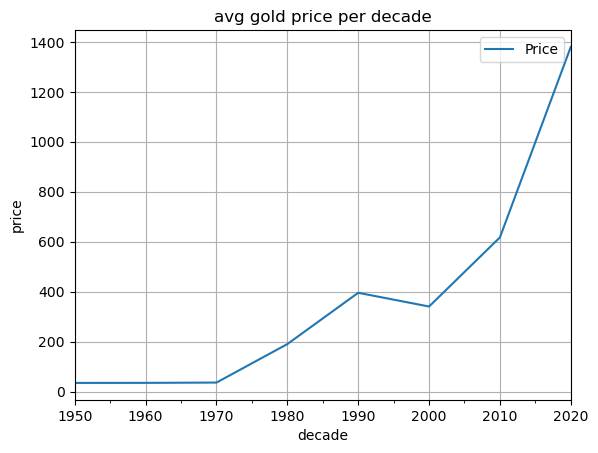

In [16]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('avg gold price per decade')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()

In [17]:
#analysis in coefficient in variation
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


Text(0, 0.5, 'CV in %')

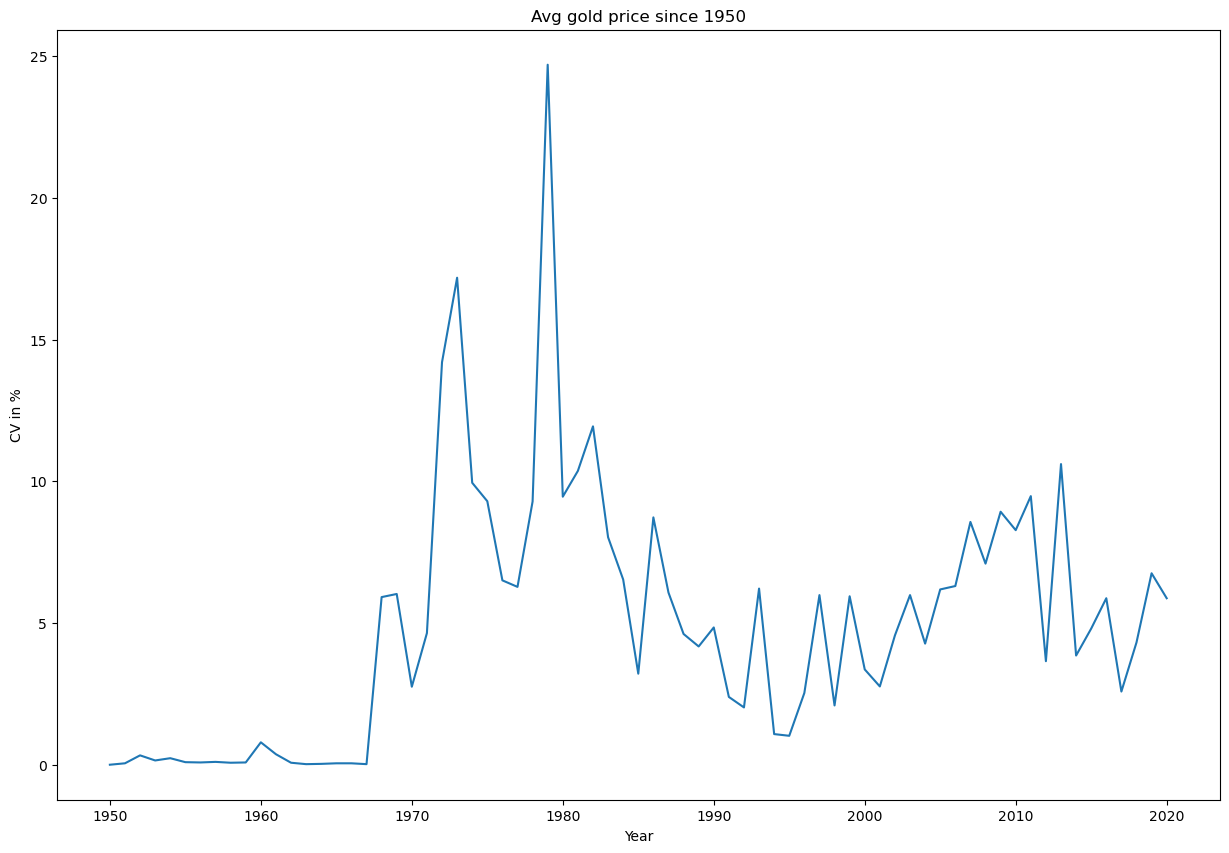

In [18]:
ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title('Avg gold price since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')

# TIME SERIES FORECASTING

In [20]:
train = df[df.index.year<=2015]
test = df[df.index.year>2015]

In [21]:
print(train.shape)
test.shape

(792, 1)


(55, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

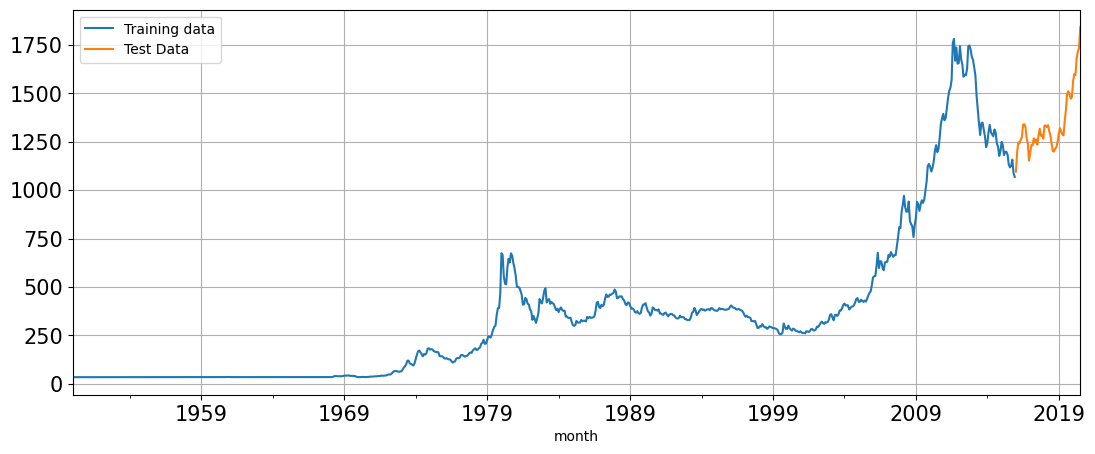

In [22]:
train['Price'].plot(figsize=(13,5) ,fontsize = 15)
test['Price'].plot(figsize=(13,5) ,fontsize = 15)
plt.grid()
plt.legend(['Training data','Test Data'])
plt.show 

In [23]:
# Model formation 
#Linear Regression Model
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [24]:
 LR_train = train.copy()
LR_test = test.copy()

In [25]:
LR_train['time']=train_time
LR_test['time']=test_time

In [26]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

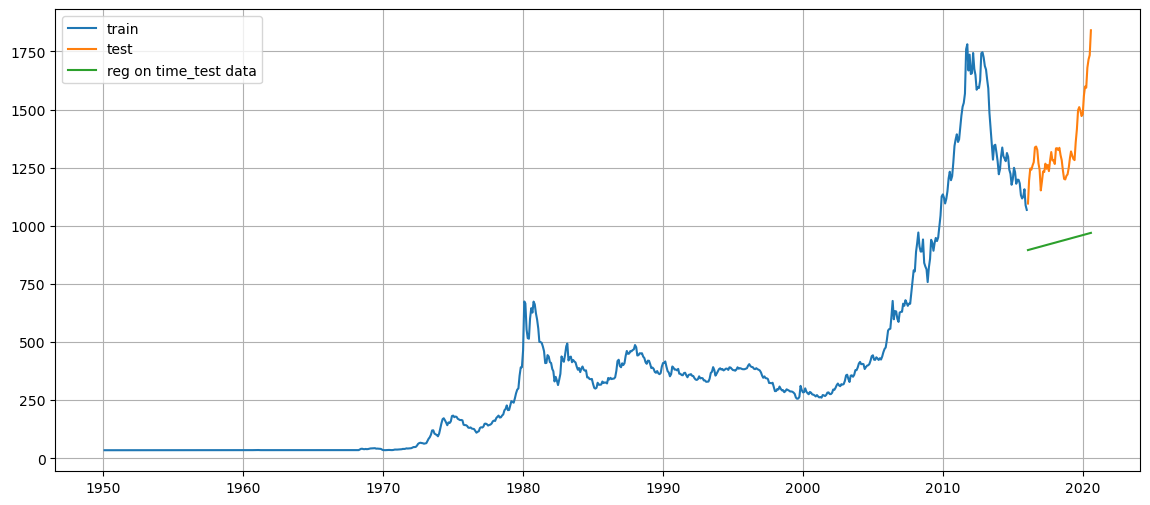

In [27]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_prediction_model1
plt.figure(figsize = (14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid();

In [28]:
def mape(actual, pred):
    return round ((np.mean(abs(actual- pred)/actual))*100,2)

In [29]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("Mape is %3.3f%%" % (mape_model1_test))

Mape is 29.760%


In [30]:
results = pd.DataFrame({'Test Mape (&)':[mape_model1_test]},index=['RegressionOnTime'])
results

,Test Mape (&)
RegressionOnTime,29.76


In [31]:
Naive_train = train.copy()
Naive_test = test.copy()

In [32]:
#Niave Training Data 
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

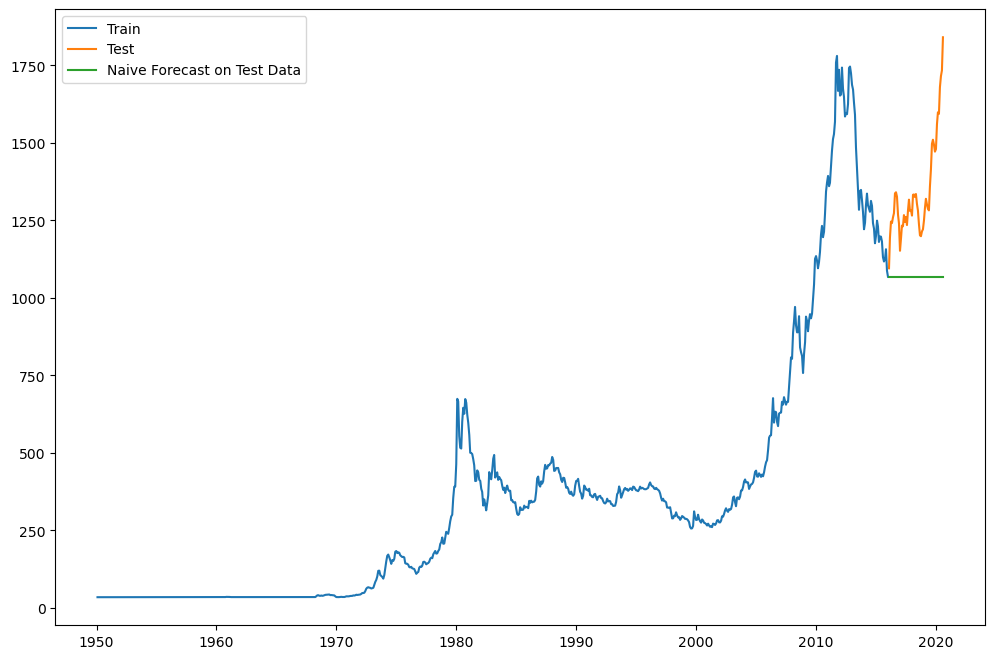

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend()
plt.show()

In [34]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print('For Naive forecast on the test data, MAPE in %3.3f' %(mape_model2_test),'%')

For Naive forecast on the test data, MAPE in 19.380 %


In [35]:
resultsDf_2 = pd.DataFrame({'Test Mape(%)': [mape_model2_test]},index=['Naivemodel'])
results = pd.concat([results,resultsDf_2])
results

,Test Mape (&),Test Mape(%)
RegressionOnTime,29.76,NaN
Naivemodel,NaN,19.38


In [36]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming df is your DataFrame with a datetime index
df.index.freq = 'M'  # Set frequency to monthly

# Create and fit the model
final_model = ExponentialSmoothing(df,
                                   trend='additive',
                                   seasonal='additive').fit(smoothing_level = 0.4,
                                                           smoothing_trend = 0.3,
                                                           smoothing_seasonal= 0.6)

In [37]:
 Mape_final_model = mape(df['Price'].values,final_model.fittedvalues)
print('Mape',Mape_final_model)


Mape 17.24


In [38]:
prediction = final_model.forecast(steps = len(test))


In [39]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':prediction,
                        'upper_CI':prediction+ 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.716748,1792.867721,1901.018694
2020-09-30,1615.298179,1723.449152,1831.600125
2020-10-31,1538.554867,1646.705839,1754.856812
2020-11-30,1476.740491,1584.891463,1693.042436
2020-12-31,1459.304892,1567.455865,1675.606837


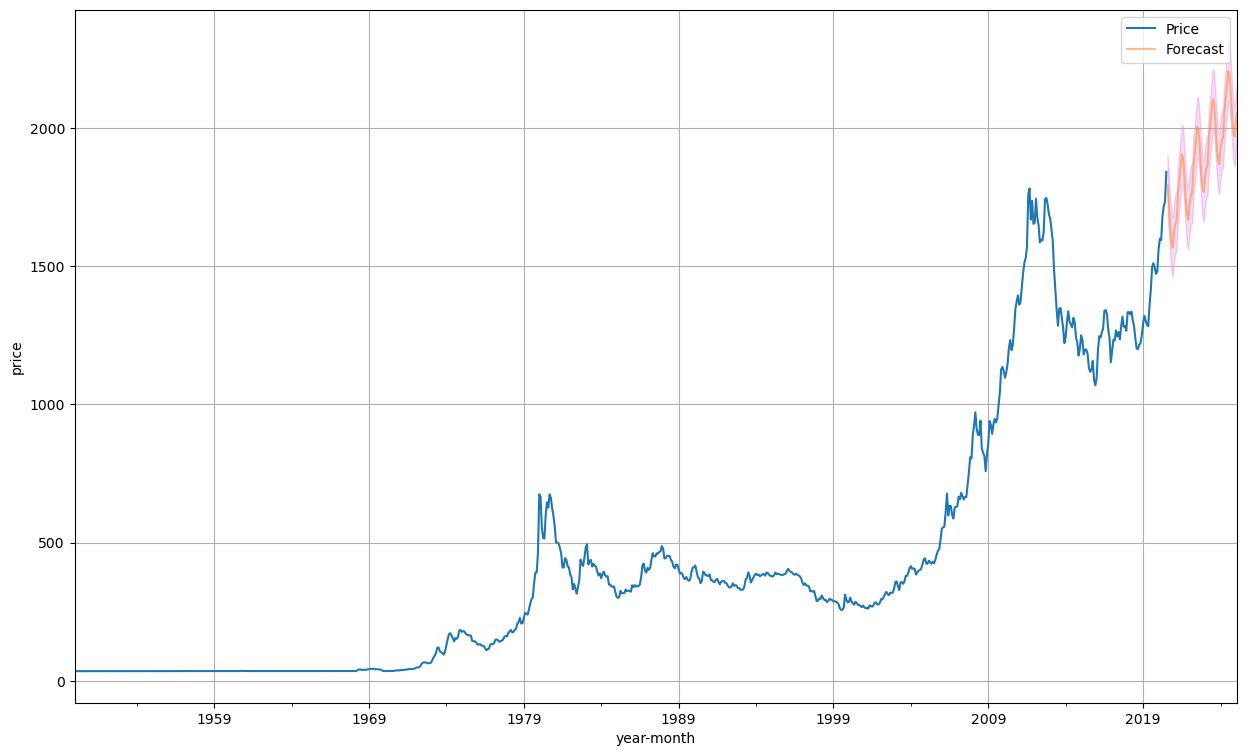

In [40]:
axis=df.plot(label = 'Actual',figsize=(15,9))
pred_df['prediction'].plot(ax=axis,label = 'Forecast',alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'],color = 'm',alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid();
plt.show()
